In [1]:
train_file_path = "D:\\Study stuff\FSDS\\01. Python\\machine-learning-project\\housing\\artifact\data_ingestion\\2022-07-05-15-13-00\ingested_data\\train\\housing.csv"
test_file_path = "D:\\Study stuff\FSDS\\01. Python\\machine-learning-project\\housing\\artifact\data_ingestion\\2022-07-05-15-13-00\ingested_data\\test\\housing.csv"

In [2]:
import pandas as pd
df = pd.read_csv(train_file_path)

In [3]:
df.shape

(16512, 10)

In [4]:
X, y = df.drop('median_house_value', axis=1), df[['median_house_value']]

In [5]:
X.shape, y.shape

((16512, 9), (16512, 1))

In [6]:
X.isna().sum(), y.isna().sum()

(longitude               0
 latitude                0
 housing_median_age      0
 total_rooms             0
 total_bedrooms        169
 population              0
 households              0
 median_income           0
 ocean_proximity         0
 dtype: int64,
 median_house_value    0
 dtype: int64)

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
numerical_columns  = X.drop("ocean_proximity", axis=1)

In [9]:
simple_imputer = SimpleImputer(strategy='median')

In [10]:
numerical_columns = simple_imputer.fit_transform(numerical_columns)

In [11]:
numerical_columns

array([[-1.1929e+02,  3.5760e+01,  1.5000e+01, ...,  3.5000e+03,
         7.6800e+02,  2.1295e+00],
       [-1.1822e+02,  3.4140e+01,  5.0000e+01, ...,  1.7250e+03,
         6.4400e+02,  5.5456e+00],
       [-1.1817e+02,  3.3870e+01,  4.9000e+01, ...,  1.3390e+03,
         4.4000e+02,  3.0319e+00],
       ...,
       [-1.1798e+02,  3.3750e+01,  3.7000e+01, ...,  7.8300e+02,
         2.7300e+02,  3.3438e+00],
       [-1.1704e+02,  3.2630e+01,  2.6000e+01, ...,  1.1660e+03,
         3.9800e+02,  5.1354e+00],
       [-1.2128e+02,  3.7980e+01,  5.2000e+01, ...,  4.1400e+02,
         1.7100e+02,  2.1429e+00]])

In [12]:
simple_imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [13]:
simple_imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2121.    ,  433.    , 1166.    ,
        408.    ,    3.5394])

In [14]:
simple_imputer_cat = SimpleImputer(strategy="most_frequent")

In [15]:
simple_imputer_cat.fit_transform(df[['ocean_proximity']])

array([['INLAND'],
       ['<1H OCEAN'],
       ['<1H OCEAN'],
       ...,
       ['<1H OCEAN'],
       ['NEAR OCEAN'],
       ['INLAND']], dtype=object)

In [16]:
simple_imputer_cat.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [17]:
simple_imputer_cat.statistics_

array(['<1H OCEAN'], dtype=object)

Custom Transformer

In [18]:
class FeatureGenerator():
    def __init__(self, strategy="median"):
        self.strategy = strategy
    def fit(self, X):
        self.features = X.columns
         
        pass
    def transform(self, X):
        pass
    def fit_transform(self, X):
        pass
#1:15 - next class

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
from housing.exception import HousingException
import sys
import numpy as np

In [20]:
COLUMN_TOTAL_ROOMS = "total_rooms"
COLUMN_POPULATION = "population"
COLUMN_HOUSEHOLDS = "households"
COLUMN_TOTAL_BEDROOM = "total_bedrooms"

class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise e

In [21]:
from sklearn.pipeline import Pipeline

In [22]:
from sklearn.compose import ColumnTransformer

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                ('feature_generator', FeatureGenerator()),
                                ('scaling',StandardScaler())
                                ])

In [25]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('feature_generator', FeatureGenerator()),
                ('scaling', StandardScaler())])

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
cat_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                ('one_hot_encoder', OneHotEncoder()),
                                ('scaling',StandardScaler(with_mean=False))
                                ])

In [28]:
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('one_hot_encoder', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])

In [29]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [30]:
num_column_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
cat_column_names = ['ocean_proximity']

In [31]:
preprocessing = ColumnTransformer(transformers=[('num_pipeline', num_pipeline, num_column_names),
                                                ('cat_pipeline', cat_pipeline, cat_column_names),
                                                ])

In [32]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-119.29,35.76,15.0,3938.0,789.0,3500.0,768.0,2.1295,INLAND
1,-118.22,34.14,50.0,3657.0,708.0,1725.0,644.0,5.5456,<1H OCEAN
2,-118.17,33.87,49.0,1937.0,445.0,1339.0,440.0,3.0319,<1H OCEAN
3,-118.95,34.19,24.0,2719.0,434.0,1318.0,424.0,4.6750,<1H OCEAN
4,-122.16,37.75,44.0,617.0,131.0,378.0,135.0,2.5568,NEAR BAY
...,...,...,...,...,...,...,...,...,...
16507,-118.28,34.07,24.0,3247.0,1281.0,2642.0,1182.0,2.4632,<1H OCEAN
16508,-118.19,34.16,49.0,1788.0,267.0,735.0,266.0,6.6009,<1H OCEAN
16509,-117.98,33.75,37.0,1264.0,274.0,783.0,273.0,3.3438,<1H OCEAN
16510,-117.04,32.63,26.0,2756.0,422.0,1166.0,398.0,5.1354,NEAR OCEAN


In [33]:
train_df = preprocessing.fit_transform(df)

In [34]:
train_df

array([[ 0.13887721,  0.06059886, -1.09190211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.6735369 , -0.69784215,  1.69144483, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.698521  , -0.82424899,  1.61192063, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.79346057, -0.8804298 ,  0.65763025, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.26316161, -1.40478409, -0.21713593, ...,  0.        ,
         0.        ,  2.98991291],
       [-0.85548989,  1.09994396,  1.85049323, ...,  0.        ,
         0.        ,  0.        ]])

In [35]:
import dill

In [36]:
with open('preprocessing.pkl', "wb") as prep_file:
    dill.dump(preprocessing, prep_file)

In [37]:
with open('preprocessing.pkl', "rb") as prep_file:
    preprocessing_load_obj = dill.load(prep_file)

In [38]:
test_df = pd.read_csv(test_file_path)

In [56]:
test_arr = preprocessing_load_obj.transform(test_df)

In [41]:
train_df

array([[ 0.13887721,  0.06059886, -1.09190211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.6735369 , -0.69784215,  1.69144483, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.698521  , -0.82424899,  1.61192063, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.79346057, -0.8804298 ,  0.65763025, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.26316161, -1.40478409, -0.21713593, ...,  0.        ,
         0.        ,  2.98991291],
       [-0.85548989,  1.09994396,  1.85049323, ...,  0.        ,
         0.        ,  0.        ]])

In [42]:
X, y = train_df, np.array(df.median_house_value)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linear_regression = LinearRegression()

In [45]:
linear_regression.fit(X,y)

LinearRegression()

In [47]:
linear_regression.coef_

array([-5.62147703e+04, -5.68788573e+04,  1.33400827e+04, -3.99321577e+03,
        8.77380464e+03, -4.48759424e+04,  4.52880147e+04,  7.49394852e+04,
        6.77141913e+03,  9.83457333e+02,  9.41282527e+03,  5.61657635e+12,
        5.26332475e+12,  1.96739221e+11,  3.55562128e+12,  3.78192581e+12])

In [48]:
linear_regression.intercept_

-11307628597425.076

In [49]:
y_hat = linear_regression.predict(X)

In [50]:
y_hat

array([ 36947.40820312, 313666.7578125 , 209657.52734375, ...,
       205619.92773438, 268704.19921875, 117428.65429688])

In [52]:
import matplotlib.pyplot as plt

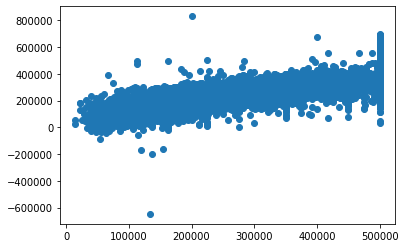

In [53]:
plt.scatter(y, y_hat)

In [54]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y,y_hat)

0.6517651064586825

In [57]:
y_test = linear_regression.predict(test_arr)

In [58]:
y_known = np.array(test_df.median_house_value)

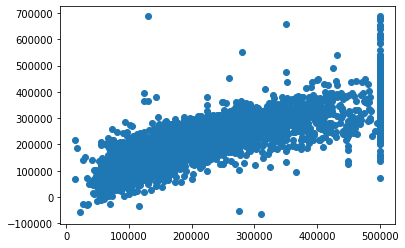

In [59]:
plt.scatter(y_known, y_test)

In [60]:
r2_score(y_known, y_test)

0.6417422610796629